# LUNG CANCER DETECTION 

In [1]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.metrics import categorical_accuracy,categorical_crossentropy, top_k_categorical_accuracy
from keras import backend as k
from keras.layers.convolutional import*
import os
import tensorflow as tf
import random as rn
from matplotlib import pyplot as plt
import itertools
from keras.models import Model
import matplotlib.pyplot as plt
from keras.optimizers import Adam,RMSprop
%matplotlib inline
import json

Using TensorFlow backend.


In [2]:
tf.keras.backend.clear_session()

In [3]:
#CREATING VARIABLES AND ASSIGNING PATH
train_path='D:/Sahana/New_Segment/train'
valid_path='D:/Sahana/New_Segment/valid'
test_path='D:/Sahana/New_Segment/test'

In [4]:
train_batches=ImageDataGenerator().flow_from_directory(train_path,target_size=(224,224),classes=['0','1'],batch_size=10)
valid_batches=ImageDataGenerator().flow_from_directory(valid_path,target_size=(224,224),classes=['000','111'],batch_size=5)
test_batches=ImageDataGenerator().flow_from_directory(test_path,target_size=(224,224),classes=['11'],batch_size=1)

Found 1082 images belonging to 2 classes.
Found 218 images belonging to 2 classes.
Found 1 images belonging to 1 classes.


In [9]:
#FUNCTION TO DISPLAY THE IMAGES
#plot image with labels
def plots(ims,figsize=(12,6),rows=1,interp=False,titles=None):
    if type(ims[0]) is np.ndarray:
        ims=np.array(ims).astype(np.uint8)
        if(ims.shape[-1]!=3):
            ims=ims.transpose((0,2,3,1))
    f=plt.figure(figsize=figsize)
    cols=len(ims)//rows if len(ims) %2==0 else len(ims)//rows+1
    for i in range(len(ims)):
        sp=f.add_subplot(rows,cols,i+1)
        sp.axis('off')
        if titles is not None:
            sp.set_title(titles[i],fontsize=16)
        plt.imshow(ims[i],cmap="CMRmap",interpolation=None if interp else 'none')

In [10]:
imgs,labels=next(train_batches)

FEW IMAGES OF TRAINING DATASET


C:\Users\Sandhya R K\Anaconda3\envs\tf-gpu\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


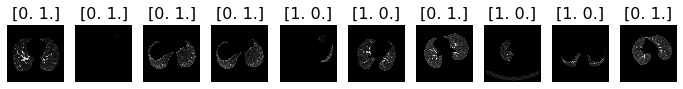

In [11]:
#we call the function plot to display images
print("FEW IMAGES OF TRAINING DATASET")
plots(imgs, titles=labels)

FEW IMAGES OF VALID DATASET


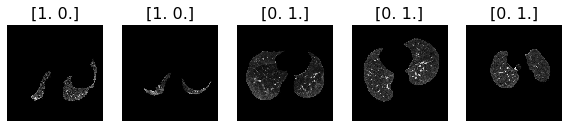

In [12]:
imgs1,labels1=next(valid_batches)
print("FEW IMAGES OF VALID DATASET")
plots(imgs1, titles=labels1)

In [14]:
import time

class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, epoch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)


In [15]:
time_callback = TimeHistory()

In [16]:
import json
from keras.callbacks import Callback, ModelCheckpoint, ReduceLROnPlateau, TensorBoard

In [17]:
from tensorflow.keras.applications.vgg19 import VGG19

In [18]:
from tensorflow.keras import layers 

In [19]:
from tensorflow.keras.optimizers import RMSprop

In [20]:
base_model = VGG19(input_shape = (224, 224, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

In [21]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [22]:
for layer in base_model.layers:
    layer.trainable = False

In [23]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer for classification
x = layers.Dense(2, activation='softmax')(x)



In [24]:
model = tf.keras.models.Model(base_model.input, x)

In [25]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [26]:
model.compile(tf.keras.optimizers.Adam(lr=.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [27]:
learn_control = ReduceLROnPlateau(monitor='val_accuracy', patience=2,
                                  verbose=1,factor=0.2)

filepath="VGG19_weights_best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

history= model.fit_generator(train_batches, steps_per_epoch=108,
                              validation_data=valid_batches,validation_steps=44,epochs=25,verbose=1,
                              callbacks=[learn_control, checkpoint,time_callback]
)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 108 steps, validate for 44 steps
Epoch 1/25
107/108 [============================>.] - ETA: 0s - loss: 2.3669 - accuracy: 0.7382
Epoch 00001: val_accuracy improved from -inf to 0.89450, saving model to VGG19_weights_best.hdf5
108/108 [==============================] - 35s 320ms/step - loss: 2.3676 - accuracy: 0.7388 - val_loss: 0.8839 - val_accuracy: 0.8945
Epoch 2/25
107/108 [============================>.] - ETA: 0s - loss: 0.6822 - accuracy: 0.9002
Epoch 00002: val_accuracy improved from 0.89450 to 0.95872, saving model to VGG19_weights_best.hdf5
108/108 [==============================] - 22s 205ms/step - loss: 0.6772 - accuracy: 0.9011 - val_loss: 0.4146 - val_accuracy: 0.9587
Epoch 3/25
107/108 [============================>.] - ETA: 0s - loss: 0.3682 - accuracy: 0.9397
Epoch 00003: val_accuracy did not improve from 0.95872
108/108 [==============

Epoch 25/25
107/108 [============================>.] - ETA: 0s - loss: 0.0736 - accuracy: 0.9765
Epoch 00025: val_accuracy did not improve from 0.96330
108/108 [==============================] - 21s 197ms/step - loss: 0.0731 - accuracy: 0.9767 - val_loss: 0.5686 - val_accuracy: 0.9633


In [28]:
sum(time_callback.times)

543.5222525596619

In [29]:
import pandas as pd

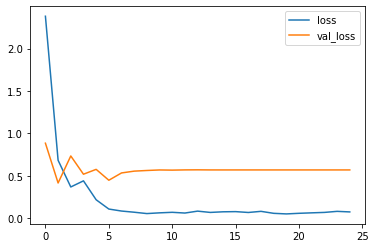

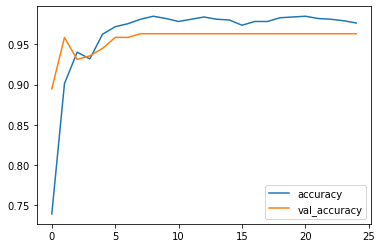

In [34]:
history_df = pd.DataFrame(history.history)
history_df[['loss', 'val_loss']].plot()

history_df = pd.DataFrame(history.history)
history_df[['accuracy', 'val_accuracy']].plot()


In [35]:
results = model.evaluate(train_batches)
print("Training set of Images")
print('loss, accuracy', results)

  ...
    to  
  ['...']
109/109 [==============================] - 16s 148ms/step - loss: 0.0295 - accuracy: 0.9917
Training set of Images
loss, accuracy [0.029495208127639956, 0.99168205]


In [36]:
results1 = model.evaluate(valid_batches)
print("Training set of Images")
print('loss, accuracy', results1)

  ...
    to  
  ['...']
44/44 [==============================] - 5s 108ms/step - loss: 0.5686 - accuracy: 0.9633
Training set of Images
loss, accuracy [0.5686213733824236, 0.96330273]


1/1 [==============================] - 0s 104ms/step


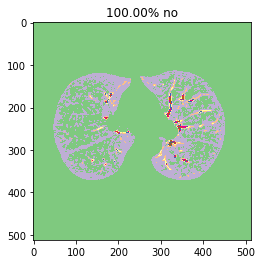

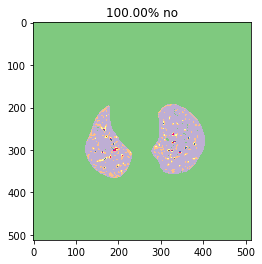

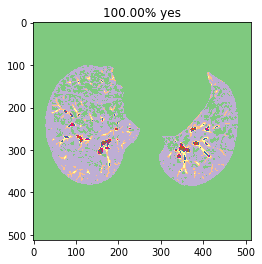

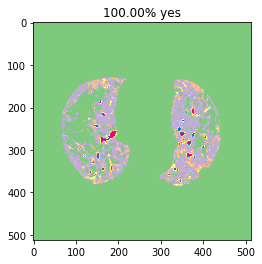

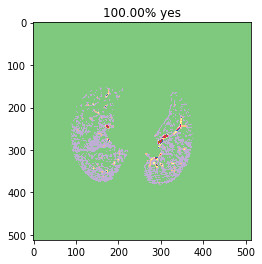

In [37]:
import matplotlib.image as mpimg
# Predicting

probabilities = model.predict_generator(valid_batches, steps=1,verbose=1)
for index, probability in enumerate(probabilities):
    image_path = valid_path + "/" +valid_batches.filenames[index]
    img = mpimg.imread(image_path)
    plt.imshow(img,cmap="Accent")
    if probability[0] > 0.5:
        plt.title("%.2f" % (probability[0]*100) + "% no")
    
    else:
        plt.title("%.2f" % ((probability[1])*100) + "% yes")
    plt.show()

# LOADING AND TESTING MODEL

In [5]:
from tensorflow.keras.models import load_model

In [6]:
model=load_model('VGG19_weights_best.hdf5')

In [15]:
test_batches=ImageDataGenerator().flow_from_directory(test_path,target_size=(224,224),classes=['111'],batch_size=1)

Found 1 images belonging to 1 classes.


In [8]:
results = model.evaluate(train_batches)
print("Training set of Images")
print('loss, accuracy', results)

  ...
    to  
  ['...']
109/109 [==============================] - 22s 205ms/step - loss: 0.0307 - accuracy: 0.9917
Training set of Images
loss, accuracy [0.030711739967616534, 0.99168205]


In [9]:
results1 = model.evaluate(valid_batches)
print("Validating set of Images")
print('loss, accuracy', results1)

  ...
    to  
  ['...']
44/44 [==============================] - 8s 190ms/step - loss: 0.5545 - accuracy: 0.9633
Validating set of Images
loss, accuracy [0.554466509441605, 0.96330273]


1/1 [==============================] - 0s 32ms/step


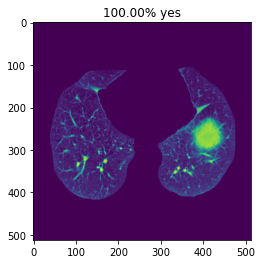

In [16]:
import matplotlib.image as mpimg
# Predicting

probabilities =model.predict_generator(test_batches, steps=1,verbose=1)
for index, probability in enumerate(probabilities):
    image_path = test_path + "/" +test_batches.filenames[index]
    img = mpimg.imread(image_path)
    plt.imshow(img)
    if probability[0] > 0.5:
        plt.title("%.2f" % (probability[0]*100) + "% no")
    
    else:
        plt.title("%.2f" % ((probability[1])*100) + "% yes")
    plt.show()

In [11]:
test_batches=ImageDataGenerator().flow_from_directory(test_path,target_size=(224,224),classes=['000'],batch_size=1)

Found 1 images belonging to 1 classes.


1/1 [==============================] - 0s 32ms/step


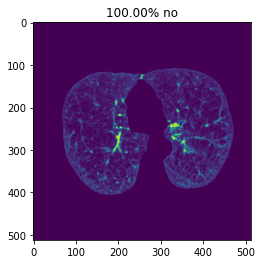

In [12]:
import matplotlib.image as mpimg
# Predicting

probabilities =model.predict_generator(test_batches, steps=1,verbose=1)
for index, probability in enumerate(probabilities):
    image_path = test_path + "/" +test_batches.filenames[index]
    img = mpimg.imread(image_path)
    plt.imshow(img)
    if probability[0] > 0.5:
        plt.title("%.2f" % (probability[0]*100) + "% no")
    
    else:
        plt.title("%.2f" % ((probability[1])*100) + "% yes")
    plt.show()